# IPL 2025 Season - WAR Analysis

Interactive analysis of Wins Above Replacement for IPL 2025 season.

**Season**: IPL 2025  
**Matches**: 74  
**Framework**: cricWAR (Rafique, 2023)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Paths
project_root = Path.cwd().parent
results_dir = project_root / 'results' / '2025_season'

## 1. Load 2025 Season WAR Results

In [2]:
# Load batter and bowler WAR
batter_war = pd.read_csv(results_dir / 'batter_war_2025.csv')
bowler_war = pd.read_csv(results_dir / 'bowler_war_2025.csv')

print(f"Batters: {len(batter_war)}")
print(f"Bowlers: {len(bowler_war)}")

# Display top 10
print("\nTop 10 Batters by WAR:")
batter_war.head(10)[['batter_name', 'WAR', 'VORP', 'RAA', 'balls_faced']]

Batters: 166
Bowlers: 128

Top 10 Batters by WAR:


,batter_name,WAR,VORP,RAA,balls_faced
0,Priyansh Arya,1.880232,201.880526,120.305414,317
1,SA Yadav,1.868321,200.601653,86.602364,443
2,SS Iyer,1.699279,182.451551,89.811046,360
3,P Simran Singh,1.576502,169.268966,72.511105,376
4,Abhishek Sharma,1.454505,156.170227,93.895221,242
5,N Pooran,1.426220,153.133254,77.219506,295
6,MR Marsh,1.343911,144.295672,38.788430,410
7,PD Salt,1.326228,142.397075,80.379404,241
8,YBK Jaiswal,1.260777,135.369654,42.729149,360
9,B Sai Sudharsan,1.250655,134.282839,3.299458,509


In [3]:
print("Top 10 Bowlers by WAR:")
bowler_war.head(10)[['bowler_name', 'WAR', 'VORP', 'RAA', 'balls_bowled']]

Top 10 Bowlers by WAR:


,bowler_name,WAR,VORP,RAA,balls_bowled
0,JJ Bumrah,1.593887,171.135632,102.875601,289
1,Kuldeep Yadav,1.492679,160.268925,83.742109,324
2,M Prasidh Krishna,1.350993,145.056125,59.081553,364
3,CV Varun,1.039262,111.585603,38.837889,308
4,Noor Ahmad,1.011046,108.555959,33.446306,318
5,SP Narine,1.009509,108.390945,43.437629,275
6,Arshdeep Singh,0.989061,106.195441,19.276094,368
7,M Pathirana,0.953810,102.410626,33.442014,292
8,DS Rathi,0.911136,97.828698,22.010463,321
9,HV Patel,0.864820,92.855713,25.304264,286


## 2. WAR Distribution

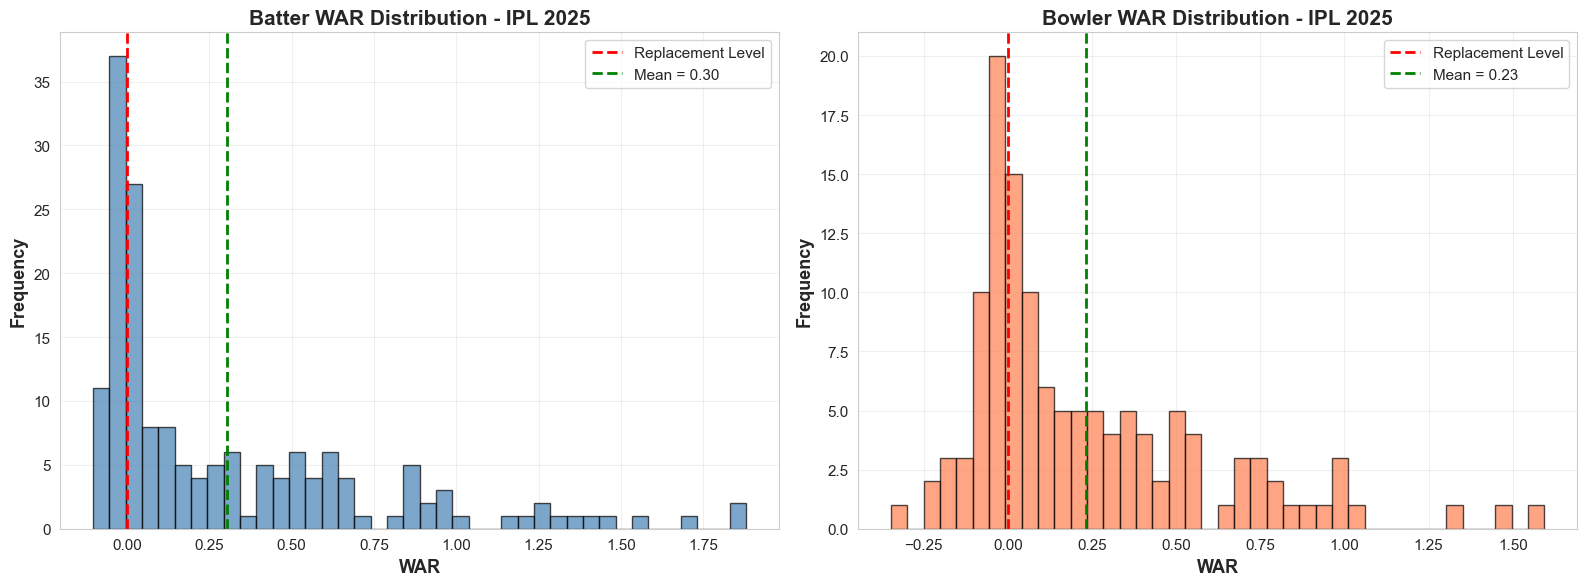

Batter WAR - Mean: 0.304, Std: 0.439
Bowler WAR - Mean: 0.232, Std: 0.365


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Batter WAR distribution
axes[0].hist(batter_war['WAR'], bins=40, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Replacement Level')
axes[0].axvline(batter_war['WAR'].mean(), color='green', linestyle='--', linewidth=2, 
               label=f'Mean = {batter_war["WAR"].mean():.2f}')
axes[0].set_xlabel('WAR', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[0].set_title('Batter WAR Distribution - IPL 2025', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Bowler WAR distribution
axes[1].hist(bowler_war['WAR'], bins=40, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Replacement Level')
axes[1].axvline(bowler_war['WAR'].mean(), color='green', linestyle='--', linewidth=2, 
               label=f'Mean = {bowler_war["WAR"].mean():.2f}')
axes[1].set_xlabel('WAR', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=13, fontweight='bold')
axes[1].set_title('Bowler WAR Distribution - IPL 2025', fontsize=15, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Batter WAR - Mean: {batter_war['WAR'].mean():.3f}, Std: {batter_war['WAR'].std():.3f}")
print(f"Bowler WAR - Mean: {bowler_war['WAR'].mean():.3f}, Std: {bowler_war['WAR'].std():.3f}")

## 3. Top Performers - IPL 2025

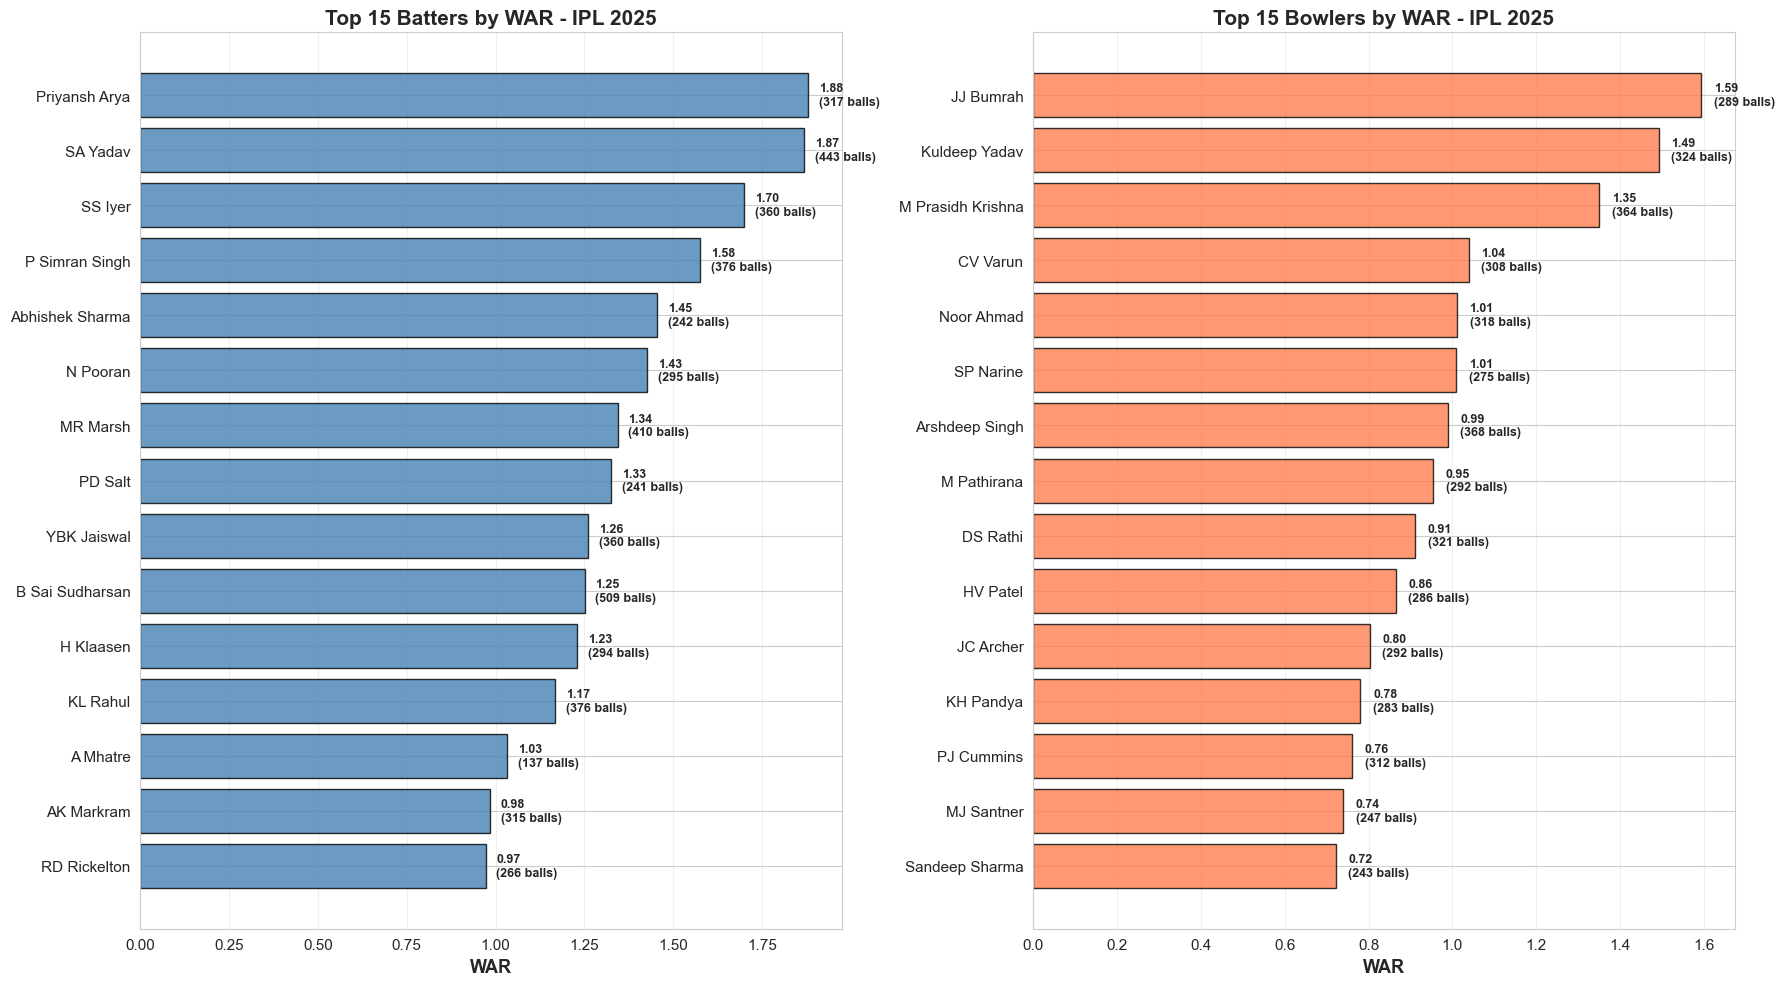

In [5]:
# Top 15 batters and bowlers
top_batters = batter_war.head(15).sort_values('WAR')
top_bowlers = bowler_war.head(15).sort_values('WAR')

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Batters
bars1 = axes[0].barh(range(len(top_batters)), top_batters['WAR'], 
                      color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_batters)))
axes[0].set_yticklabels(top_batters['batter_name'], fontsize=11)
axes[0].set_xlabel('WAR', fontsize=13, fontweight='bold')
axes[0].set_title('Top 15 Batters by WAR - IPL 2025', fontsize=15, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add values on bars
for i, (v, balls) in enumerate(zip(top_batters['WAR'], top_batters['balls_faced'])):
    axes[0].text(v + 0.03, i, f'{v:.2f}\n({balls} balls)', 
                va='center', fontsize=9, fontweight='bold')

# Bowlers
bars2 = axes[1].barh(range(len(top_bowlers)), top_bowlers['WAR'], 
                      color='coral', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(top_bowlers)))
axes[1].set_yticklabels(top_bowlers['bowler_name'], fontsize=11)
axes[1].set_xlabel('WAR', fontsize=13, fontweight='bold')
axes[1].set_title('Top 15 Bowlers by WAR - IPL 2025', fontsize=15, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add values on bars
for i, (v, balls) in enumerate(zip(top_bowlers['WAR'], top_bowlers['balls_bowled'])):
    axes[1].text(v + 0.03, i, f'{v:.2f}\n({balls} balls)', 
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. WAR vs Playing Time

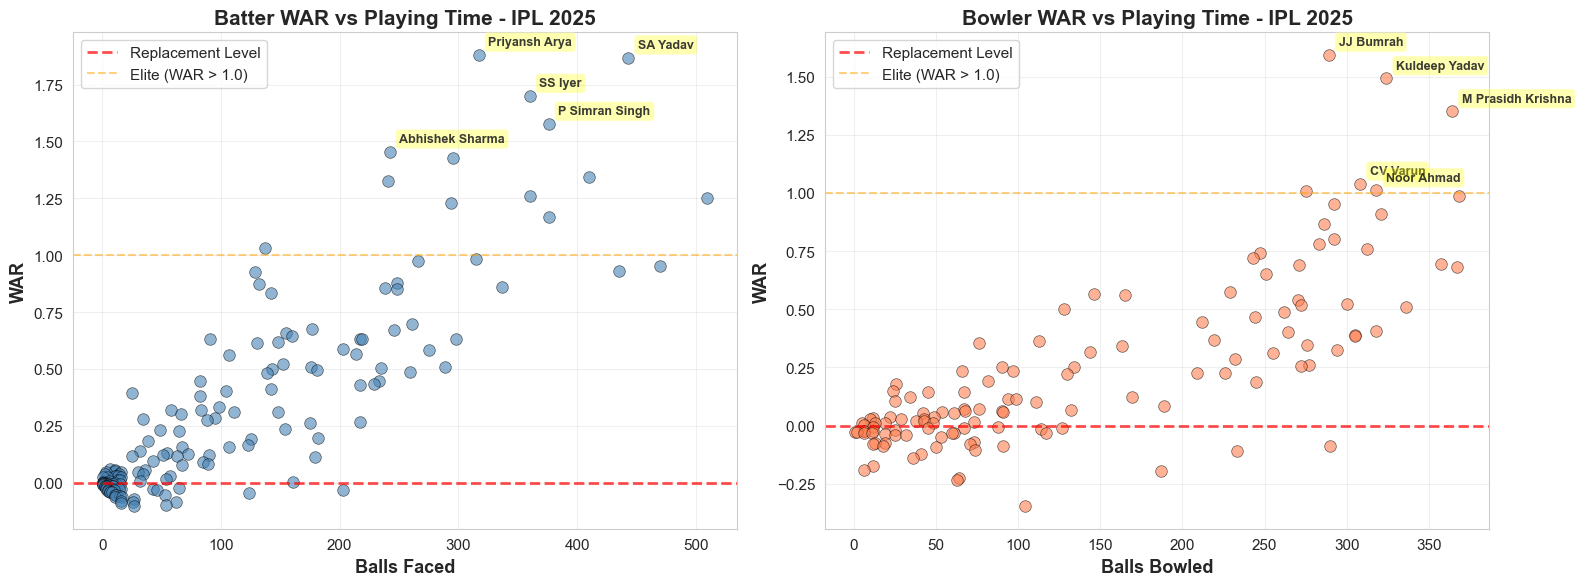

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Batters: WAR vs Balls Faced
axes[0].scatter(batter_war['balls_faced'], batter_war['WAR'], 
               alpha=0.6, s=70, color='steelblue', edgecolors='black', linewidth=0.5)
axes[0].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Replacement Level')
axes[0].axhline(1.0, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Elite (WAR > 1.0)')
axes[0].set_xlabel('Balls Faced', fontsize=13, fontweight='bold')
axes[0].set_ylabel('WAR', fontsize=13, fontweight='bold')
axes[0].set_title('Batter WAR vs Playing Time - IPL 2025', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Annotate top 5 batters
for _, row in batter_war.head(5).iterrows():
    axes[0].annotate(row['batter_name'], 
                    (row['balls_faced'], row['WAR']),
                    xytext=(7, 7), textcoords='offset points',
                    fontsize=9, alpha=0.9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Bowlers: WAR vs Balls Bowled
axes[1].scatter(bowler_war['balls_bowled'], bowler_war['WAR'], 
               alpha=0.6, s=70, color='coral', edgecolors='black', linewidth=0.5)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Replacement Level')
axes[1].axhline(1.0, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Elite (WAR > 1.0)')
axes[1].set_xlabel('Balls Bowled', fontsize=13, fontweight='bold')
axes[1].set_ylabel('WAR', fontsize=13, fontweight='bold')
axes[1].set_title('Bowler WAR vs Playing Time - IPL 2025', fontsize=15, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

# Annotate top 5 bowlers
for _, row in bowler_war.head(5).iterrows():
    axes[1].annotate(row['bowler_name'], 
                    (row['balls_bowled'], row['WAR']),
                    xytext=(7, 7), textcoords='offset points',
                    fontsize=9, alpha=0.9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

## 5. Efficiency Metrics (WAR per Ball)

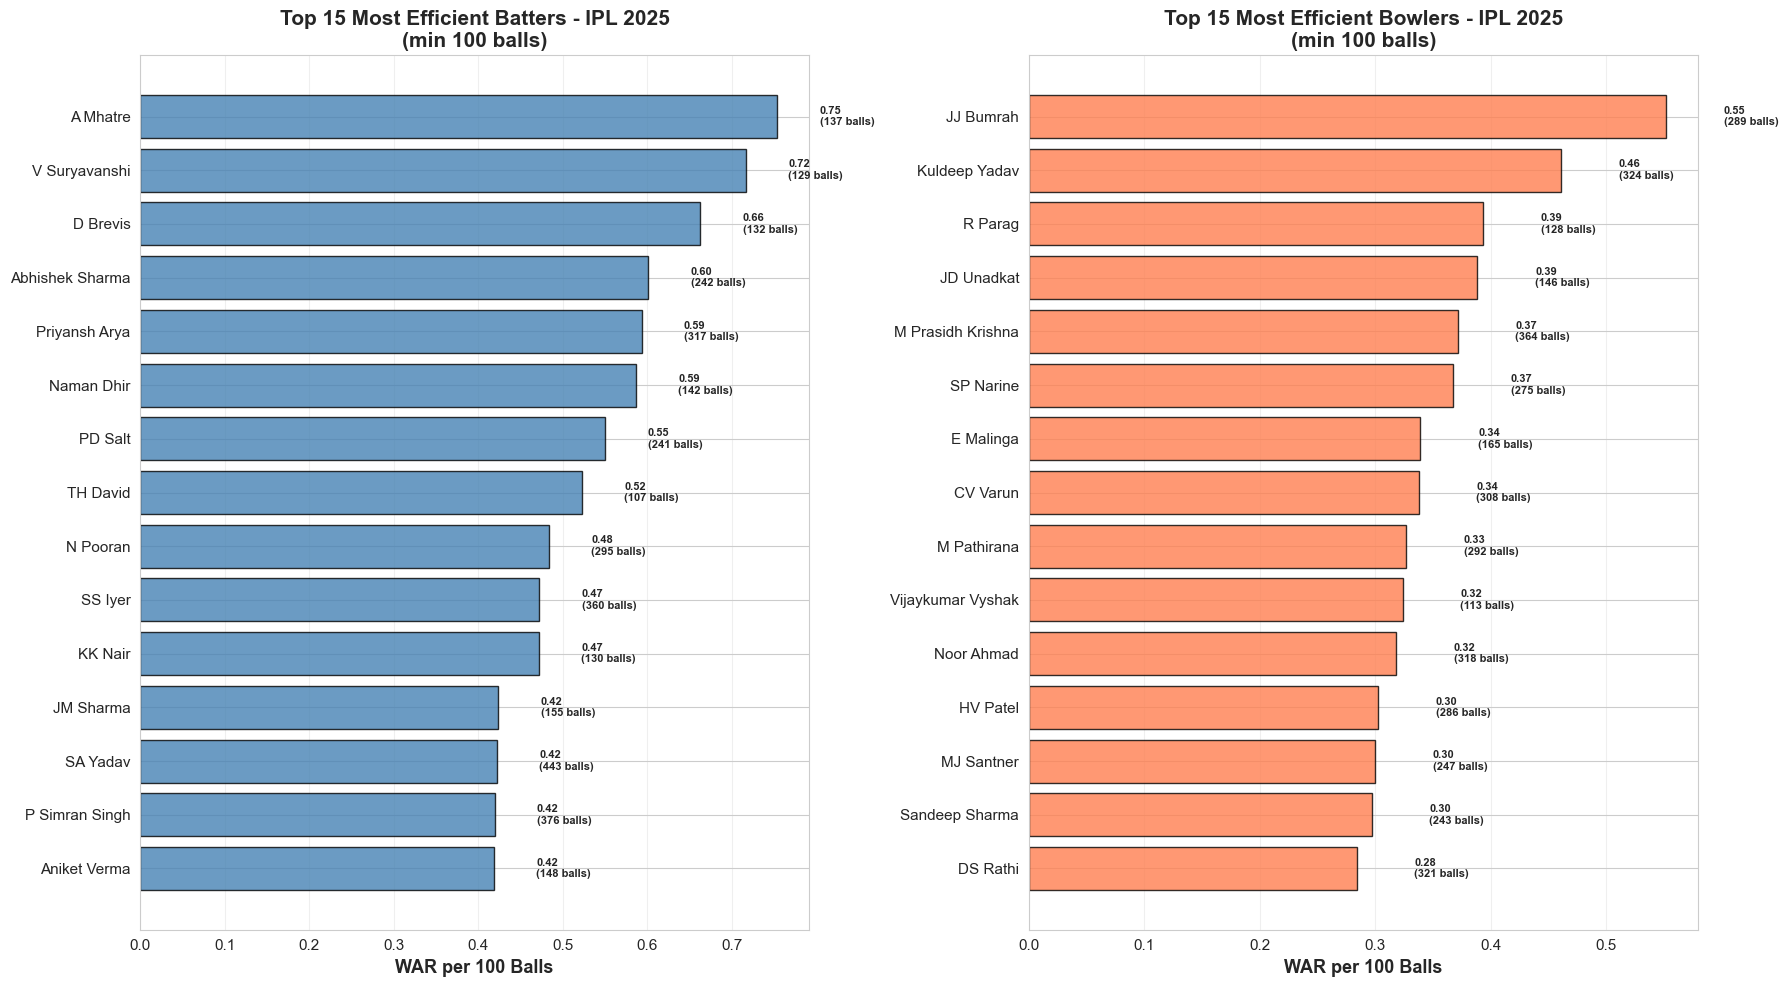

In [7]:
# Filter qualified players (min 100 balls for visualization clarity)
qualified_batters = batter_war[batter_war['balls_faced'] >= 100].copy()
qualified_bowlers = bowler_war[bowler_war['balls_bowled'] >= 100].copy()

# Top by efficiency
top_efficient_batters = qualified_batters.nlargest(15, 'WAR_per_ball')
top_efficient_bowlers = qualified_bowlers.nlargest(15, 'WAR_per_ball')

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Batters
top_efficient_batters_sorted = top_efficient_batters.sort_values('WAR_per_ball')
axes[0].barh(range(len(top_efficient_batters_sorted)), 
            top_efficient_batters_sorted['WAR_per_ball'] * 100, 
            color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_efficient_batters_sorted)))
axes[0].set_yticklabels(top_efficient_batters_sorted['batter_name'], fontsize=11)
axes[0].set_xlabel('WAR per 100 Balls', fontsize=13, fontweight='bold')
axes[0].set_title('Top 15 Most Efficient Batters - IPL 2025\n(min 100 balls)', 
                 fontsize=15, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add values
for i, (v, balls) in enumerate(zip(top_efficient_batters_sorted['WAR_per_ball'] * 100, 
                                     top_efficient_batters_sorted['balls_faced'])):
    axes[0].text(v + 0.05, i, f'{v:.2f}\n({balls} balls)', 
                va='center', fontsize=8, fontweight='bold')

# Bowlers
top_efficient_bowlers_sorted = top_efficient_bowlers.sort_values('WAR_per_ball')
axes[1].barh(range(len(top_efficient_bowlers_sorted)), 
            top_efficient_bowlers_sorted['WAR_per_ball'] * 100,
            color='coral', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(top_efficient_bowlers_sorted)))
axes[1].set_yticklabels(top_efficient_bowlers_sorted['bowler_name'], fontsize=11)
axes[1].set_xlabel('WAR per 100 Balls', fontsize=13, fontweight='bold')
axes[1].set_title('Top 15 Most Efficient Bowlers - IPL 2025\n(min 100 balls)', 
                 fontsize=15, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add values
for i, (v, balls) in enumerate(zip(top_efficient_bowlers_sorted['WAR_per_ball'] * 100, 
                                     top_efficient_bowlers_sorted['balls_bowled'])):
    axes[1].text(v + 0.05, i, f'{v:.2f}\n({balls} balls)', 
                va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Combined Leaderboard

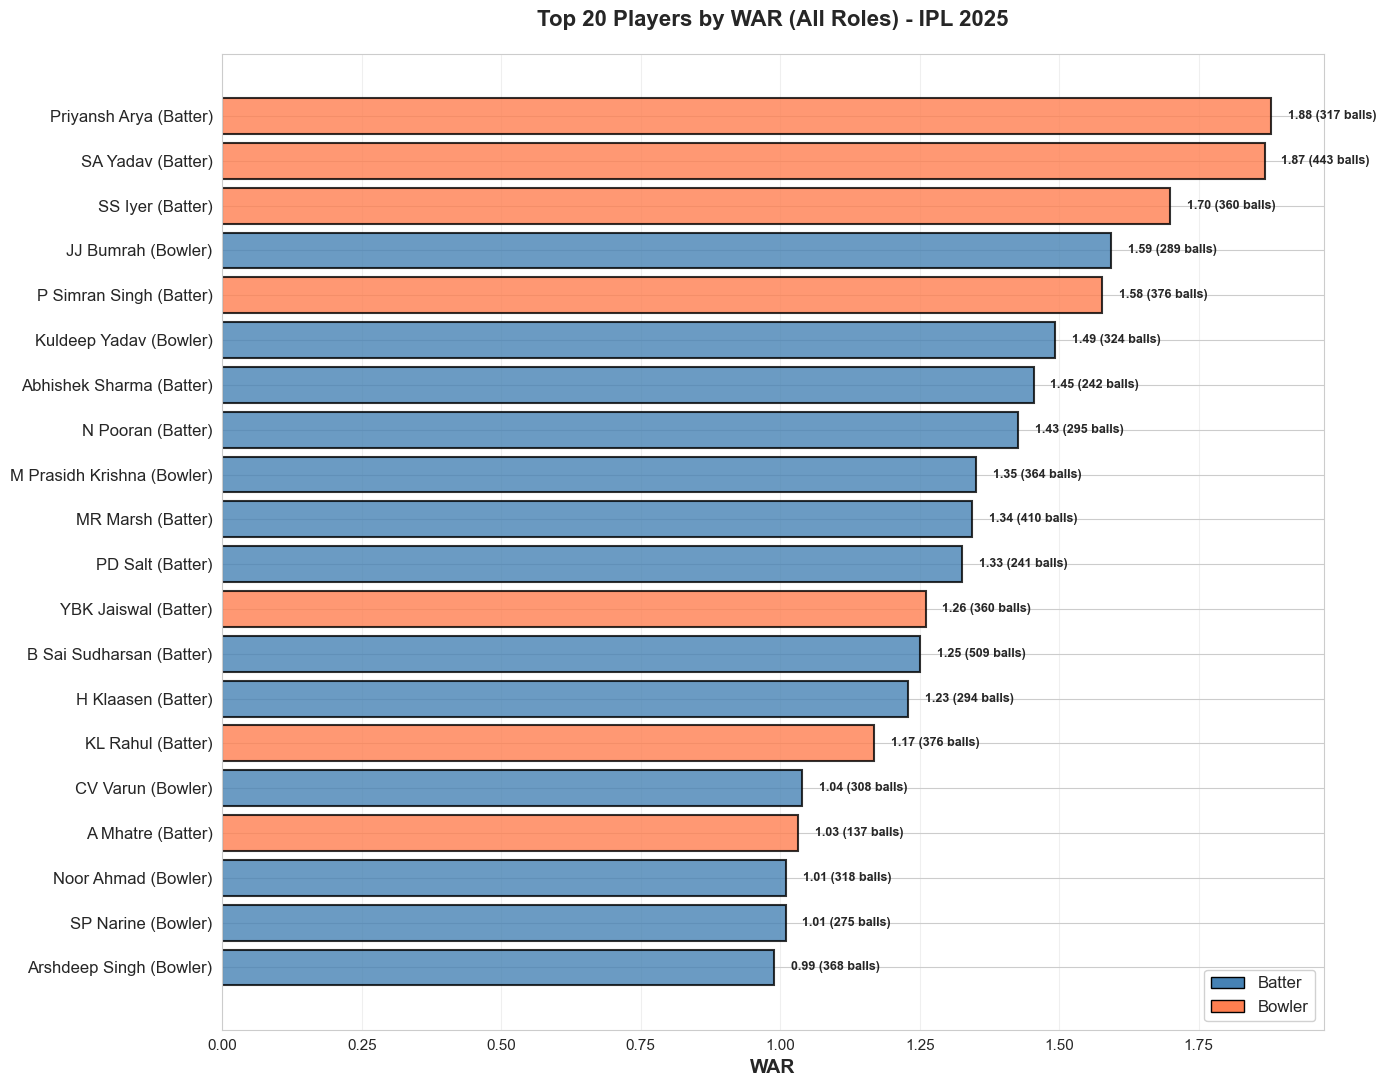

,player_name,WAR,VORP,balls,role
0,Priyansh Arya,1.880232,201.880526,317,Batter
1,SA Yadav,1.868321,200.601653,443,Batter
2,SS Iyer,1.699279,182.451551,360,Batter
0,JJ Bumrah,1.593887,171.135632,289,Bowler
3,P Simran Singh,1.576502,169.268966,376,Batter
1,Kuldeep Yadav,1.492679,160.268925,324,Bowler
4,Abhishek Sharma,1.454505,156.170227,242,Batter
5,N Pooran,1.426220,153.133254,295,Batter
2,M Prasidh Krishna,1.350993,145.056125,364,Bowler
6,MR Marsh,1.343911,144.295672,410,Batter


In [8]:
# Combine batters and bowlers
batters_for_combined = batter_war[['batter_name', 'WAR', 'VORP', 'balls_faced']].copy()
batters_for_combined.columns = ['player_name', 'WAR', 'VORP', 'balls']
batters_for_combined['role'] = 'Batter'

bowlers_for_combined = bowler_war[['bowler_name', 'WAR', 'VORP', 'balls_bowled']].copy()
bowlers_for_combined.columns = ['player_name', 'WAR', 'VORP', 'balls']
bowlers_for_combined['role'] = 'Bowler'

combined = pd.concat([batters_for_combined, bowlers_for_combined])
combined = combined.sort_values('WAR', ascending=False).head(20)

# Visualization
plt.figure(figsize=(14, 11))
colors = ['steelblue' if role == 'Batter' else 'coral' for role in combined['role']]

combined_sorted = combined.sort_values('WAR')
bars = plt.barh(range(len(combined_sorted)), combined_sorted['WAR'], 
                color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

plt.yticks(range(len(combined_sorted)), 
           [f"{row['player_name']} ({row['role']})" for _, row in combined_sorted.iterrows()],
           fontsize=12)
plt.xlabel('WAR', fontsize=14, fontweight='bold')
plt.title('Top 20 Players by WAR (All Roles) - IPL 2025', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', edgecolor='black', label='Batter'),
                   Patch(facecolor='coral', edgecolor='black', label='Bowler')]
plt.legend(handles=legend_elements, loc='lower right', fontsize=12, framealpha=0.9)

# Add values
for i, (v, balls) in enumerate(zip(combined_sorted['WAR'], combined_sorted['balls'])):
    plt.text(v + 0.03, i, f'{v:.2f} ({int(balls)} balls)', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Display table
combined.head(20)

## 7. Summary Statistics

In [9]:
print("=" * 70)
print("IPL 2025 SEASON - WAR SUMMARY STATISTICS")
print("=" * 70)

print("\nBATTERS:")
print(f"  Total players: {len(batter_war)}")
print(f"  Mean WAR: {batter_war['WAR'].mean():.3f}")
print(f"  Median WAR: {batter_war['WAR'].median():.3f}")
print(f"  Max WAR: {batter_war['WAR'].max():.3f} ({batter_war.loc[batter_war['WAR'].idxmax(), 'batter_name']})")
print(f"  Min WAR: {batter_war['WAR'].min():.3f} ({batter_war.loc[batter_war['WAR'].idxmin(), 'batter_name']})")
print(f"  Players with WAR > 1.0: {(batter_war['WAR'] > 1.0).sum()}")
print(f"  Players with WAR > 0.5: {(batter_war['WAR'] > 0.5).sum()}")
print(f"  Players with WAR < 0.0: {(batter_war['WAR'] < 0.0).sum()}")

print("\nBOWLERS:")
print(f"  Total players: {len(bowler_war)}")
print(f"  Mean WAR: {bowler_war['WAR'].mean():.3f}")
print(f"  Median WAR: {bowler_war['WAR'].median():.3f}")
print(f"  Max WAR: {bowler_war['WAR'].max():.3f} ({bowler_war.loc[bowler_war['WAR'].idxmax(), 'bowler_name']})")
print(f"  Min WAR: {bowler_war['WAR'].min():.3f} ({bowler_war.loc[bowler_war['WAR'].idxmin(), 'bowler_name']})")
print(f"  Players with WAR > 1.0: {(bowler_war['WAR'] > 1.0).sum()}")
print(f"  Players with WAR > 0.5: {(bowler_war['WAR'] > 0.5).sum()}")
print(f"  Players with WAR < 0.0: {(bowler_war['WAR'] < 0.0).sum()}")

print("\n" + "=" * 70)

IPL 2025 SEASON - WAR SUMMARY STATISTICS

BATTERS:
  Total players: 166
  Mean WAR: 0.304
  Median WAR: 0.104
  Max WAR: 1.880 (Priyansh Arya)
  Min WAR: -0.103 (M Theekshana)
  Players with WAR > 1.0: 13
  Players with WAR > 0.5: 44
  Players with WAR < 0.0: 54

BOWLERS:
  Total players: 128
  Mean WAR: 0.232
  Median WAR: 0.091
  Max WAR: 1.594 (JJ Bumrah)
  Min WAR: -0.347 (Fazalhaq Farooqi)
  Players with WAR > 1.0: 6
  Players with WAR > 0.5: 27
  Players with WAR < 0.0: 40



## 8. RAA vs VORP Comparison

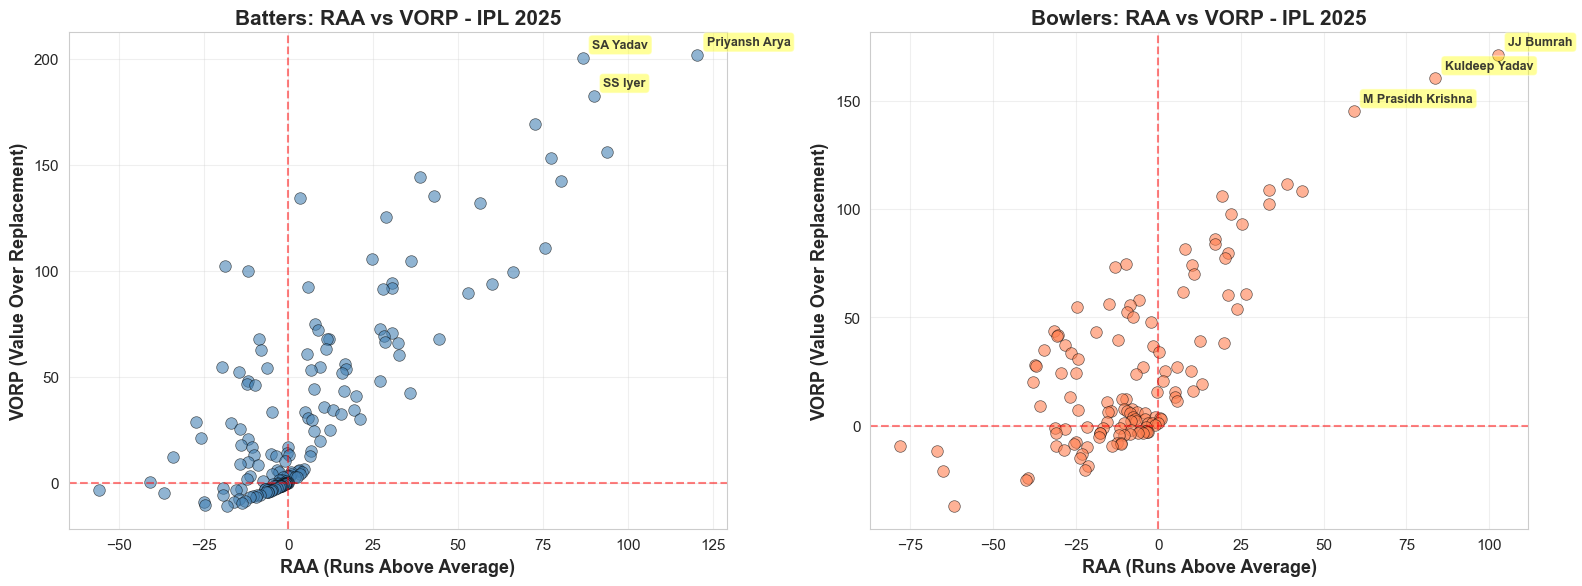

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Batters: RAA vs VORP
axes[0].scatter(batter_war['RAA'], batter_war['VORP'], 
               alpha=0.6, s=70, color='steelblue', edgecolors='black', linewidth=0.5)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0].axvline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0].set_xlabel('RAA (Runs Above Average)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('VORP (Value Over Replacement)', fontsize=13, fontweight='bold')
axes[0].set_title('Batters: RAA vs VORP - IPL 2025', fontsize=15, fontweight='bold')
axes[0].grid(alpha=0.3)

# Annotate top 3
for _, row in batter_war.head(3).iterrows():
    axes[0].annotate(row['batter_name'], 
                    (row['RAA'], row['VORP']),
                    xytext=(7, 7), textcoords='offset points',
                    fontsize=9, alpha=0.9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.4))

# Bowlers: RAA vs VORP
axes[1].scatter(bowler_war['RAA'], bowler_war['VORP'], 
               alpha=0.6, s=70, color='coral', edgecolors='black', linewidth=0.5)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].axvline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].set_xlabel('RAA (Runs Above Average)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('VORP (Value Over Replacement)', fontsize=13, fontweight='bold')
axes[1].set_title('Bowlers: RAA vs VORP - IPL 2025', fontsize=15, fontweight='bold')
axes[1].grid(alpha=0.3)

# Annotate top 3
for _, row in bowler_war.head(3).iterrows():
    axes[1].annotate(row['bowler_name'], 
                    (row['RAA'], row['VORP']),
                    xytext=(7, 7), textcoords='offset points',
                    fontsize=9, alpha=0.9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.4))

plt.tight_layout()
plt.show()

## 9. Key Insights - IPL 2025

### Top Performers

**Batters**:
1. **Priyansh Arya**: Breakout season with 1.88 WAR (highest efficiency: 0.0059 WAR/ball)
2. **Suryakumar Yadav**: Consistent excellence with 1.87 WAR
3. **Shreyas Iyer**: Strong performance with 1.70 WAR

**Bowlers**:
1. **Jasprit Bumrah**: Dominant season with 1.59 WAR (best efficiency: 0.0055 WAR/ball)
2. **Kuldeep Yadav**: Excellent spin performance with 1.49 WAR
3. **Prasidh Krishna**: Strong pace bowling with 1.35 WAR

### Key Statistics
- **Elite batters** (WAR > 1.0): 13 players
- **Elite bowlers** (WAR > 1.0): 6 players
- **Most efficient batter**: Priyansh Arya (0.59 WAR per 100 balls)
- **Most efficient bowler**: Jasprit Bumrah (0.55 WAR per 100 balls)

### Trends
- Bowling dominance continues with top performers showing high efficiency
- Emergence of new talent (Priyansh Arya, P Simran Singh)
- Established stars (Bumrah, SKY, Kuldeep) maintain elite status